# Customer Lifetime Value

## Section 1: Project Definition

In marketing, "Acquiring a new customer can cost five times more than retaining an existing customer". 

In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pn

In [2]:
#Load data
df = pd.read_csv (r'reseller_change_money.csv')

In [3]:
df

,domain_name,money,freq,recency,t,CLV
0,atad.com.vn,9489.72,35,2,977,15969.72
1,panservices.vn,10175.82,19,216,1220,10175.82
2,ved.com.vn,12135.25,234,2,1585,14370.58
3,yeah1group.com,3029.20,32,2,916,3239.20
4,rever.vn,213.40,23,2,305,501.76
...,...,...,...,...,...,...
1858,hungvietgroup.vn,14.46,1,1554,1554,14.46
1859,regent.com,0.07,1,1220,1220,0.07
1860,sensia.vn,1.12,1,1312,1312,1.12
1861,tesla.edu.vn,11.73,1,2,2,226.44


In [4]:
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)

In [5]:
df['recency'].min()

2

In [6]:
from lifetimes import BetaGeoFitter

In [7]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(train['freq'],
train['money'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 1490 subjects, p: 0.17, q: 1.01, v: 3326.82>


In [8]:
train["predicted_monetary"] = ggf.conditional_expected_average_profit(train['freq'],train['money'])

In [9]:
train

,domain_name,money,freq,recency,t,CLV,predicted_monetary
488,vipecjsc.com.vn,24.00,1,1220,1220,24.00,3202.513447
522,sbcsteel.com,3152.15,42,397,1585,3152.15,3227.801010
593,cornerstone.com.vn,3018.88,81,2,1585,4242.55,3058.203410
1117,mywayhotelnhatrang.com,293.96,3,886,1251,293.96,1381.572841
949,hakuta.com.vn,869.55,29,2,1554,1148.43,982.698614
...,...,...,...,...,...,...,...
841,asianmotors.vn,653.76,17,2,1493,769.10,847.147469
335,nammodelagency.com,455.13,41,2,1585,528.83,535.666858
516,paragoncdst.com.vn,907.88,27,2,1342,1054.27,1029.330014
936,vn.ids.jp,3656.42,28,977,1585,3656.42,3769.001436


In [10]:
from xgboost import XGBClassifier, XGBRegressor

In [11]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [12]:
X = train[["recency", "freq", "money","t"]]

In [13]:
y = train["CLV"]

In [14]:
xgb_reg_spec = XGBRegressor(objective="reg:squarederror", randomstate = 123)
xgb_reg_model = GridSearchCV(estimator = xgb_reg_spec, 
                             param_grid = dict(learning_rate = [0.01, 0.1, 0.3, 0.5]),
                             scoring ="neg_mean_absolute_error", refit = True, cv = 5)

In [15]:
xgb_reg_model.fit(X, y)

[10:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This c

[10:17:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [16]:
train['xgb_CLV'] = xgb_reg_model.predict(X)

In [17]:
train

,domain_name,money,freq,recency,t,CLV,predicted_monetary,xgb_CLV
488,vipecjsc.com.vn,24.00,1,1220,1220,24.00,3202.513447,29.601074
522,sbcsteel.com,3152.15,42,397,1585,3152.15,3227.801010,3218.180664
593,cornerstone.com.vn,3018.88,81,2,1585,4242.55,3058.203410,3738.860107
1117,mywayhotelnhatrang.com,293.96,3,886,1251,293.96,1381.572841,290.244263
949,hakuta.com.vn,869.55,29,2,1554,1148.43,982.698614,1174.907959
...,...,...,...,...,...,...,...,...
841,asianmotors.vn,653.76,17,2,1493,769.10,847.147469,841.138428
335,nammodelagency.com,455.13,41,2,1585,528.83,535.666858,575.988403
516,paragoncdst.com.vn,907.88,27,2,1342,1054.27,1029.330014,1190.013916
936,vn.ids.jp,3656.42,28,977,1585,3656.42,3769.001436,3764.186523


In [27]:
train.to_csv(r'./out.csv', sep='\t')

In [28]:
train.to_csv(r'./out2.csv', sep='\t', encoding='utf-8', header='true')

In [18]:
train.to_csv(r'./out6.csv', encoding='utf-8')

In [19]:
train

,domain_name,money,freq,recency,t,CLV,predicted_monetary,xgb_CLV
488,vipecjsc.com.vn,24.00,1,1220,1220,24.00,3202.513447,29.601074
522,sbcsteel.com,3152.15,42,397,1585,3152.15,3227.801010,3218.180664
593,cornerstone.com.vn,3018.88,81,2,1585,4242.55,3058.203410,3738.860107
1117,mywayhotelnhatrang.com,293.96,3,886,1251,293.96,1381.572841,290.244263
949,hakuta.com.vn,869.55,29,2,1554,1148.43,982.698614,1174.907959
...,...,...,...,...,...,...,...,...
841,asianmotors.vn,653.76,17,2,1493,769.10,847.147469,841.138428
335,nammodelagency.com,455.13,41,2,1585,528.83,535.666858,575.988403
516,paragoncdst.com.vn,907.88,27,2,1342,1054.27,1029.330014,1190.013916
936,vn.ids.jp,3656.42,28,977,1585,3656.42,3769.001436,3764.186523


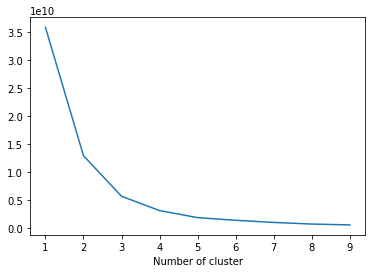

In [20]:
from sklearn.cluster import KMeans
clv = train[["CLV"]]
ss2 ={}
for k in range(1,10):
    kmeans2 = KMeans(n_clusters = k, max_iter = 10000).fit(clv)
    train["clusters"]=kmeans2.labels_
    ss2[k]=kmeans2.inertia_
plt.figure()
plt.plot(list(ss2.keys()), list(ss2.values()))
plt.xlabel("Number of cluster")
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

#Dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(clv)
  labels = kmeans.labels_
  sil.append(silhouette_score(clv, labels, metric = 'euclidean'))

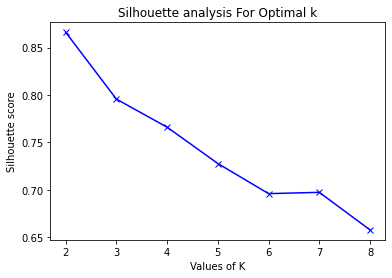

In [22]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 #Initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(clv)
 cluster_labels = kmeans.labels_
 
 #Silhouette score
 silhouette_avg.append(silhouette_score(clv, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [23]:
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(clv)

KMeans(n_clusters=2)

In [24]:
kmeans1.cluster_centers_

array([[ 1597.73359637],
       [21870.47396552]])

In [25]:
train["clv_labels"] = kmeans1.labels_

In [26]:
train

,domain_name,money,freq,recency,t,CLV,predicted_monetary,xgb_CLV,clusters,clv_labels
488,vipecjsc.com.vn,24.00,1,1220,1220,24.00,3202.513447,29.601074,0,0
522,sbcsteel.com,3152.15,42,397,1585,3152.15,3227.801010,3218.180664,3,0
593,cornerstone.com.vn,3018.88,81,2,1585,4242.55,3058.203410,3738.860107,3,0
1117,mywayhotelnhatrang.com,293.96,3,886,1251,293.96,1381.572841,290.244263,0,0
949,hakuta.com.vn,869.55,29,2,1554,1148.43,982.698614,1174.907959,6,0
...,...,...,...,...,...,...,...,...,...,...
841,asianmotors.vn,653.76,17,2,1493,769.10,847.147469,841.138428,0,0
335,nammodelagency.com,455.13,41,2,1585,528.83,535.666858,575.988403,0,0
516,paragoncdst.com.vn,907.88,27,2,1342,1054.27,1029.330014,1190.013916,6,0
936,vn.ids.jp,3656.42,28,977,1585,3656.42,3769.001436,3764.186523,3,0


<AxesSubplot:xlabel='CLV'>

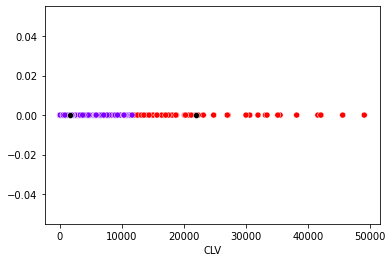

In [27]:
sns.scatterplot(data = train, x="CLV", y=0, c= kmeans1.labels_, cmap= 'rainbow' )

sns.scatterplot(x=kmeans1.cluster_centers_[:, 0], y = 0, c=['black'])

In [28]:
train.to_csv(r'./out7.csv', encoding='utf-8')

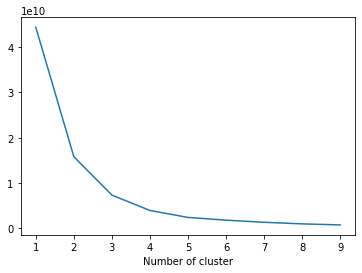

In [29]:
from sklearn.cluster import KMeans
clv1 = df[["CLV"]]
ss3 ={}
for k in range(1,10):
    kmeans3 = KMeans(n_clusters = k, max_iter = 10000).fit(clv1)
    df["clusters"]=kmeans3.labels_
    ss3[k]=kmeans3.inertia_
plt.figure()
plt.plot(list(ss3.keys()), list(ss3.values()))
plt.xlabel("Number of cluster")
plt.show()

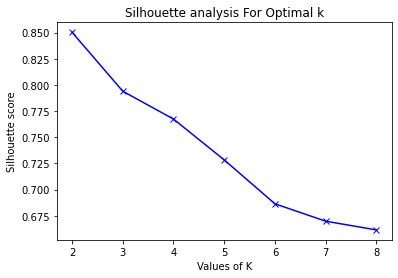

In [30]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 #Initialise kmeans
 kmeans5 = KMeans(n_clusters=num_clusters)
 kmeans5.fit(clv1)
 cluster_labels = kmeans5.labels_
 
 #Silhouette score
 silhouette_avg.append(silhouette_score(clv1, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [31]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(clv1)

KMeans(n_clusters=2)

In [32]:
kmeans2.cluster_centers_

array([[ 1447.20703641],
       [18438.73171429]])

In [33]:
df["clv_labels"] = kmeans2.labels_

<AxesSubplot:xlabel='CLV'>

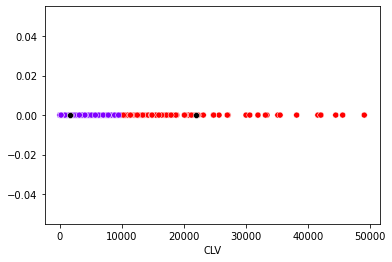

In [34]:
sns.scatterplot(data = df, x="CLV", y=0, c= kmeans2.labels_, cmap= 'rainbow' )

sns.scatterplot(x=kmeans1.cluster_centers_[:, 0], y = 0, c=['black'])

In [35]:
df.to_csv(r'./out8.csv', encoding='utf-8')

In [3]:
tk_sub = tk[["card_number","tk_issdate", "fare_total"]]

In [4]:
tk = tk_sub

In [5]:
tk

,card_number,tk_issdate,fare_total
0,93166682.0,2020-09-27,1290000.0
1,9200251591.0,2020-07-20,1470000.0
2,9101332968.0,2021-12-21,1495000.0
3,9200335332.0,2021-03-11,9581000.0
4,98319512.0,2020-08-25,1730000.0
...,...,...,...
26997,9000076843.0,2020-12-30,5980000.0
26998,94183123.0,2020-08-19,5980000.0
26999,99234652.0,2020-09-10,5980000.0
27000,90121878.0,2020-12-23,5980000.0


In [6]:
tk_train = tk[tk["tk_issdate"].astype(str).str[:4] != '2022']

In [7]:
tk_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21625 entries, 0 to 27001
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   card_number  21625 non-null  object        
 1   tk_issdate   21625 non-null  datetime64[ns]
 2   fare_total   21625 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 675.8+ KB


In [8]:
tk_target = tk

In [9]:
tk_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27002 entries, 0 to 27001
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   card_number  27002 non-null  object        
 1   tk_issdate   27002 non-null  datetime64[ns]
 2   fare_total   27002 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 633.0+ KB


In [10]:
max_date = tk_train["tk_issdate"].max()

In [11]:
max_date

Timestamp('2021-12-31 00:00:00')

In [12]:
statis_recency_ft = tk_train[["card_number", "tk_issdate"]].groupby("card_number").apply(lambda x: (x["tk_issdate"].max() - x["tk_issdate"].min()) / pd.to_timedelta(1,"day")).to_frame().set_axis(["statis_recency"], axis = 1)

In [13]:
statis_recency_ft

,statis_recency
card_number,
90005806.0,442.0
90009340.0,299.0
90021926.0,514.0
90024258.0,472.0
90025237.0,421.0
...,...
116818083237.0,84.0
180007059511.0,239.0
513629874998.0,1.0


In [14]:
frequency_ft = tk_train[["card_number", "tk_issdate"]].groupby("card_number").count().set_axis(["frequency"], axis = 1)

In [15]:
frequency_ft

,frequency
card_number,
90005806.0,9
90009340.0,25
90021926.0,42
90024258.0,31
90025237.0,13
...,...
116818083237.0,5
180007059511.0,2
513629874998.0,2


In [16]:
monetary_ft = tk_train[["card_number", "fare_total"]].groupby("card_number").sum().set_axis(["monetary"], axis = 1)

In [17]:
marketing_recency_ft = tk_train[["card_number", "tk_issdate"]].groupby("card_number").apply(lambda x: (max_date - x["tk_issdate"].max()) / pd.to_timedelta(1,"day")).to_frame().set_axis(["mkt_recency"], axis = 1)

In [18]:
marketing_recency_ft

,mkt_recency
card_number,
90005806.0,2.0
90009340.0,240.0
90021926.0,13.0
90024258.0,0.0
90025237.0,16.0
...,...
116818083237.0,350.0
180007059511.0,21.0
513629874998.0,519.0


In [19]:
features = pd.concat((statis_recency_ft, frequency_ft, monetary_ft, marketing_recency_ft), axis = 1).merge(tk_target, left_index = True, right_index = True, how = "left").fillna(0)

In [20]:
features = features.drop(columns=['fare_total'])

In [21]:
features

,statis_recency,frequency,monetary,mkt_recency,card_number,tk_issdate
card_number,,,,,,
90005806.0,442.0,9,16693000.0,2.0,0,0
90009340.0,299.0,25,78021000.0,240.0,0,0
90021926.0,514.0,42,69822000.0,13.0,0,0
90024258.0,472.0,31,132220000.0,0.0,0,0
90025237.0,421.0,13,15045000.0,16.0,0,0
...,...,...,...,...,...,...
116818083237.0,84.0,5,10943000.0,350.0,0,0
180007059511.0,239.0,2,6832000.0,21.0,0,0
513629874998.0,1.0,2,2680000.0,519.0,0,0


In [22]:
features["monetary_avg"] = features["monetary"]/features["frequency"]

In [23]:
customer_age_ft = tk_train[["card_number", "tk_issdate"]].groupby("card_number").apply(lambda x: (max_date - x["tk_issdate"].min()) / pd.to_timedelta(1,"day")).to_frame().set_axis(["mkt_recency"], axis = 1)

In [24]:
features["customer_age"]=customer_age_ft["mkt_recency"]

In [25]:
tk_target

,card_number,tk_issdate,fare_total
0,93166682.0,2020-09-27,1290000.0
1,9200251591.0,2020-07-20,1470000.0
2,9101332968.0,2021-12-21,1495000.0
3,9200335332.0,2021-03-11,9581000.0
4,98319512.0,2020-08-25,1730000.0
...,...,...,...
26997,9000076843.0,2020-12-30,5980000.0
26998,94183123.0,2020-08-19,5980000.0
26999,99234652.0,2020-09-10,5980000.0
27000,90121878.0,2020-12-23,5980000.0


In [26]:
target = tk_target.groupby("card_number").sum().rename(columns={'fare_total':'CLV','card_number' : 'card_number'}).assign(spend_flag = 1)

In [27]:
features = features.merge(target, left_index = True, right_index = True, how = "left").fillna(0)

In [28]:
#ft = features_new.merge(features_2, left_index = True, right_index = True, how = "left")

NameError: name 'features_new' is not defined

In [ ]:
#ft

In [ ]:
#ft["st"] = ft["monetary"] + ft["predicted_monetary"]*ft["predicted_purchases_100"]

In [29]:
from sklearn.cluster import KMeans

In [30]:
fr = features[["frequency"]]

C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/3497397517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/3497397517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/3497397517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

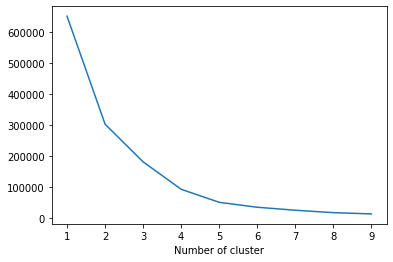

In [31]:
sse ={}
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(fr)
    fr["clusters"]=kmeans.labels_
    sse[k]=kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/3729501365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/3729501365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/3729501365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

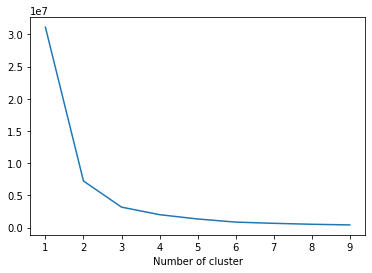

In [34]:
sr = features[["statis_recency"]]
ss1 ={}
for k in range(1,10):
    kmeans1 = KMeans(n_clusters = k, max_iter = 1000).fit(sr)
    fr["clusters"]=kmeans1.labels_
    ss1[k]=kmeans1.inertia_
plt.figure()
plt.plot(list(ss1.keys()), list(ss1.values()))
plt.xlabel("Number of cluster")
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/2611638542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/2611638542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/2611638542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

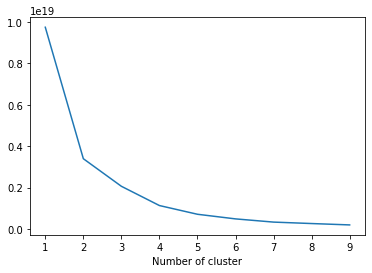

In [35]:
mn = features[["monetary"]]
ss2 ={}
for k in range(1,10):
    kmeans2 = KMeans(n_clusters = k, max_iter = 10000).fit(mn)
    fr["clusters"]=kmeans2.labels_
    ss2[k]=kmeans2.inertia_
plt.figure()
plt.plot(list(ss2.keys()), list(ss2.values()))
plt.xlabel("Number of cluster")
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/2898741985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/2898741985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_12744/2898741985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

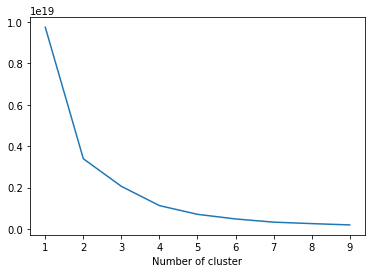

In [36]:
mr = features[["mkt_recency"]]
ss3 ={}
for k in range(1,10):
    kmeans3 = KMeans(n_clusters = k, max_iter = 10000).fit(mn)
    fr["clusters"]=kmeans3.labels_
    ss3[k]=kmeans3.inertia_
plt.figure()
plt.plot(list(ss3.keys()), list(ss3.values()))
plt.xlabel("Number of cluster")
plt.show()

In [37]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(sr)
  labels = kmeans.labels_
  sil.append(silhouette_score(sr, labels, metric = 'euclidean'))

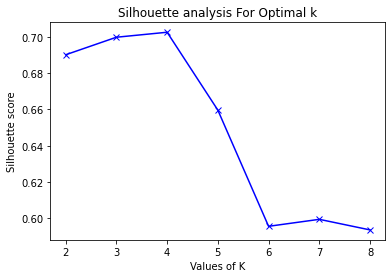

In [38]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(sr)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(sr, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [39]:
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(fr)

KMeans(n_clusters=2)

In [40]:
kmeans1.cluster_centers_

array([[15.01679587,  3.79328165],
       [68.04081633,  4.10204082]])

In [41]:
kmeans1.labels_

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [42]:
features["fr_cluster"] = kmeans1.labels_

In [43]:
features["fr_labels"] = 1 - features["fr_cluster"]

In [44]:
features

,statis_recency,frequency,monetary,mkt_recency,card_number,tk_issdate,monetary_avg,customer_age,CLV,spend_flag,fr_cluster,fr_labels
card_number,,,,,,,,,,,,
90005806.0,442.0,9,16693000.0,2.0,0,0,1.854778e+06,444.0,28740000.0,1,0,1
90009340.0,299.0,25,78021000.0,240.0,0,0,3.120840e+06,539.0,84742000.0,1,0,1
90021926.0,514.0,42,69822000.0,13.0,0,0,1.662429e+06,527.0,107897000.0,1,1,0
90024258.0,472.0,31,132220000.0,0.0,0,0,4.265161e+06,472.0,150697000.0,1,0,1
90025237.0,421.0,13,15045000.0,16.0,0,0,1.157308e+06,437.0,19843000.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
116818083237.0,84.0,5,10943000.0,350.0,0,0,2.188600e+06,434.0,14589000.0,1,0,1
180007059511.0,239.0,2,6832000.0,21.0,0,0,3.416000e+06,260.0,31957000.0,1,0,1
513629874998.0,1.0,2,2680000.0,519.0,0,0,1.340000e+06,520.0,2680000.0,1,0,1


<AxesSubplot:xlabel='frequency'>

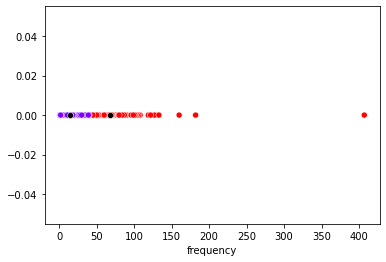

In [45]:
sns.scatterplot(data = features, x="frequency", y=0, c= kmeans1.labels_, cmap= 'rainbow' )

sns.scatterplot(x=kmeans1.cluster_centers_[:, 0], y = 0, c=['black'])

In [46]:
kmeans1.cluster_centers_

array([[15.01679587,  3.79328165],
       [68.04081633,  4.10204082]])

In [47]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(sr)

KMeans(n_clusters=4)

In [48]:
kmeans2.cluster_centers_

array([[483.88372093],
       [ 42.52201258],
       [242.70550162],
       [716.17391304]])

In [49]:
features["sr_labels"] = kmeans2.labels_

In [50]:
features

,statis_recency,frequency,monetary,mkt_recency,card_number,tk_issdate,monetary_avg,customer_age,CLV,spend_flag,fr_cluster,fr_labels,sr_labels
card_number,,,,,,,,,,,,,
90005806.0,442.0,9,16693000.0,2.0,0,0,1.854778e+06,444.0,28740000.0,1,0,1,0
90009340.0,299.0,25,78021000.0,240.0,0,0,3.120840e+06,539.0,84742000.0,1,0,1,2
90021926.0,514.0,42,69822000.0,13.0,0,0,1.662429e+06,527.0,107897000.0,1,1,0,0
90024258.0,472.0,31,132220000.0,0.0,0,0,4.265161e+06,472.0,150697000.0,1,0,1,0
90025237.0,421.0,13,15045000.0,16.0,0,0,1.157308e+06,437.0,19843000.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116818083237.0,84.0,5,10943000.0,350.0,0,0,2.188600e+06,434.0,14589000.0,1,0,1,1
180007059511.0,239.0,2,6832000.0,21.0,0,0,3.416000e+06,260.0,31957000.0,1,0,1,2
513629874998.0,1.0,2,2680000.0,519.0,0,0,1.340000e+06,520.0,2680000.0,1,0,1,1


In [51]:
features

,statis_recency,frequency,monetary,mkt_recency,card_number,tk_issdate,monetary_avg,customer_age,CLV,spend_flag,fr_cluster,fr_labels,sr_labels
card_number,,,,,,,,,,,,,
90005806.0,442.0,9,16693000.0,2.0,0,0,1.854778e+06,444.0,28740000.0,1,0,1,0
90009340.0,299.0,25,78021000.0,240.0,0,0,3.120840e+06,539.0,84742000.0,1,0,1,2
90021926.0,514.0,42,69822000.0,13.0,0,0,1.662429e+06,527.0,107897000.0,1,1,0,0
90024258.0,472.0,31,132220000.0,0.0,0,0,4.265161e+06,472.0,150697000.0,1,0,1,0
90025237.0,421.0,13,15045000.0,16.0,0,0,1.157308e+06,437.0,19843000.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116818083237.0,84.0,5,10943000.0,350.0,0,0,2.188600e+06,434.0,14589000.0,1,0,1,1
180007059511.0,239.0,2,6832000.0,21.0,0,0,3.416000e+06,260.0,31957000.0,1,0,1,2
513629874998.0,1.0,2,2680000.0,519.0,0,0,1.340000e+06,520.0,2680000.0,1,0,1,1


In [52]:
features.loc[features['sr_cluster'] == 10, 'sr_cluster'] = 2

KeyError: 'sr_cluster'

In [65]:
features[features['sr_labels'] == 0]

,statis_recency,frequency,monetary,mkt_recency,card_number,tk_issdate,monetary_avg,customer_age,CLV,spend_flag,fr_cluster,fr_labels,sr_labels
card_number,,,,,,,,,,,,,
9.000581e+07,442.0,9,16693000.0,2.0,0,0,1.854778e+06,444.0,2.874000e+07,1,0,1,0
9.002193e+07,514.0,42,69822000.0,13.0,0,0,1.662429e+06,527.0,1.078970e+08,1,1,0,0
9.002426e+07,472.0,31,132220000.0,0.0,0,0,4.265161e+06,472.0,1.506970e+08,1,0,1,0
9.002524e+07,421.0,13,15045000.0,16.0,0,0,1.157308e+06,437.0,1.984300e+07,1,0,1,0
9.006283e+07,483.0,129,971193000.0,35.0,0,0,7.528628e+06,518.0,1.254422e+09,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.901334e+09,498.0,31,55858000.0,20.0,0,0,1.801871e+06,518.0,6.558700e+07,1,0,1,0
9.901981e+09,541.0,19,44880000.0,0.0,0,0,2.362105e+06,541.0,5.103400e+07,1,0,1,0
9.902230e+09,455.0,26,31436000.0,15.0,0,0,1.209077e+06,470.0,4.215600e+07,1,0,1,0


In [ ]:
features[features]

In [ ]:
kmeans3 = KMeans(n_clusters=2)
kmeans3.fit(mr)

In [ ]:
kmeans4 = KMeans(n_clusters=2)
kmeans4.fit(mn)

In [ ]:
kmeans3.cluster_centers_

In [ ]:
kmeans4.cluster_centers_

In [ ]:
features["mr_labels"] = kmeans3.labels_

In [ ]:
features["mn_labels"] = kmeans4.labels_

In [ ]:
features["sr_labels"] = features["sr_cluster"]

In [ ]:
features

In [ ]:
features

In [ ]:
features = features.drop(columns=['sr_cluster'])

In [ ]:
features["rfm_scores"] = features["fr_labels"] + features["mn_labels"] + features["sr_labels"]

In [ ]:
features["mkt_rfm_scores"] = features["fr_labels"] + features["mn_labels"] + features["mr_labels"]

In [ ]:
features[["mkt_rfm_scores"]].sort_values(by='mkt_rfm_scores')

In [ ]:
features.loc[features['sr_labels'] == 10, 'sr_labels'] = 3

In [ ]:
features.loc[features['mr_labels'] == 3, 'mr_labels'] = 1

In [ ]:
from lifetimes import BetaGeoFitter

In [ ]:
bgf1 = BetaGeoFitter(penalizer_coef=0.0)
bgf1.fit(features['frequency'], features['recency'], features['customer_age'])
print(bgf1)
"""
<lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43,
˓→r: 0.24>
"""
bgf1.summary

In [ ]:
bgf1 = BetaGeoFitter()
bgf1.fit(features['frequency'], features['recency'], features['customer_age'])
print(bgf1)
bgf1.summary

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf)

In [ ]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [ ]:
t = 100
features['predicted_purchases_100'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, features['frequency'], features['statis_recency'], features['customer_age'])
features.sort_values(by='predicted_purchases').tail(5)

In [ ]:
features_2

In [ ]:
features_new["probality_alive"] = bgf.conditional_probability_alive(features_new['frequency'], features_new['statis_recency'], features_new['customer_age'])

In [ ]:
features = features.drop(columns=['recency'])

In [ ]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(features_new['frequency'],
features_new['monetary_avg'])
print(ggf)

In [ ]:
features_new["predicted_monetary"] = ggf.conditional_expected_average_profit(features_new['frequency'],features_new['monetary_avg'])

In [ ]:
features_new = features.loc[features["monetary_avg"] > 0 ]

In [ ]:
ft[["monetary", "monetary_avg", "CLV", "prob_CLV", "rf_CLV", "XGB_CLV"]]

In [ ]:
ft["prob_CLV"] = ft["st"]

In [ ]:
features_new["Probality_CLV"] = features_new["predicted_purchases"] * features_new["predicted_monetary"]

In [ ]:
from xgboost import XGBClassifier, XGBRegressor

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
X = features_new[["statis_recency", "frequency", "monetary", "mkt_recency", "monetary_avg", "customer_age"]]

In [ ]:
y = features_new["CLV"]

In [ ]:
xgb_reg_spec = XGBRegressor(objective="reg:squarederror", randomstate = 123)
xgb_reg_model = GridSearchCV(estimator = xgb_reg_spec, param_grid = dict(learning_rate = [0.01, 0.1, 0.3, 0.5]),scoring ="neg_mean_absolute_error", refit = True, cv = 5)

In [ ]:
xgb_reg_model.fit(X, y)

In [ ]:
(ft["st"] - ft["CLV"]).abs().sum()/919

In [ ]:
(ft["st"] - ft["CLV"]).abs().max()

In [ ]:
features_new

In [ ]:
(features_new["rf_CLV"] - features_new["CLV"]).abs().min()

In [ ]:
(features_new["rf_CLV"] - features_new["CLV"]).abs().sum()/features_new["CLV"].count()

In [ ]:
tk_target["tk_issdate"].max()

In [ ]:
tk_target["tk_issdate"].min()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rg = RandomForestRegressor(n_estimators = 30, random_state = 30)

In [ ]:
rf = model_rg.fit(X_train, y_train)

In [ ]:
rf.score(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
print("MAE: %.2f"%mean_absolute_error(y_train, y_pred))

In [ ]:
print("MSE: %.2f"%mean_squared_error(y_train, y_pred))

In [ ]:
print("EVS: %.2f"%explained_variance_score(y_train, y_pred))

In [ ]:
y_test_pred = rf.predict(X_test)

In [ ]:
print("R_sq: %.2f"%r2_score(y_test, y_test_pred))

In [ ]:
rf.score(X_test, y_test)

In [ ]:
plt.rcParams["figure.figsize"] =(20,10)

In [ ]:
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = "Observed", color = 'k', linestyle = "-")
plt.plot(x_ax, y_test_pred, label = "Predicted", color = 'red', linestyle = "--")

In [ ]:
model_rg1 = RandomForestRegressor(n_estimators = 30, random_state = 30)

In [ ]:
rf1 = model_rg.fit(X, y)

In [ ]:
features_new["rf_CLV"] = rf1.predict(X)

In [ ]:
features_new

In [ ]:
cor = features.corr()

In [ ]:
features

In [ ]:
cor

In [ ]:
import plydata.cat_tools as cat